In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
path  = "C:/Users/User/Downloads/7113.KL(2017-2022).csv"
df = pd.read_csv(path, index_col='Date', parse_dates=['Date'], date_parser=dateparse)

In [3]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [4]:
df.fillna(method='ffill', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1028 entries, 2017-10-27 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1028 non-null   float64
 1   High       1028 non-null   float64
 2   Low        1028 non-null   float64
 3   Close      1028 non-null   float64
 4   Adj Close  1028 non-null   float64
 5   Volume     1028 non-null   float64
dtypes: float64(6)
memory usage: 56.2 KB


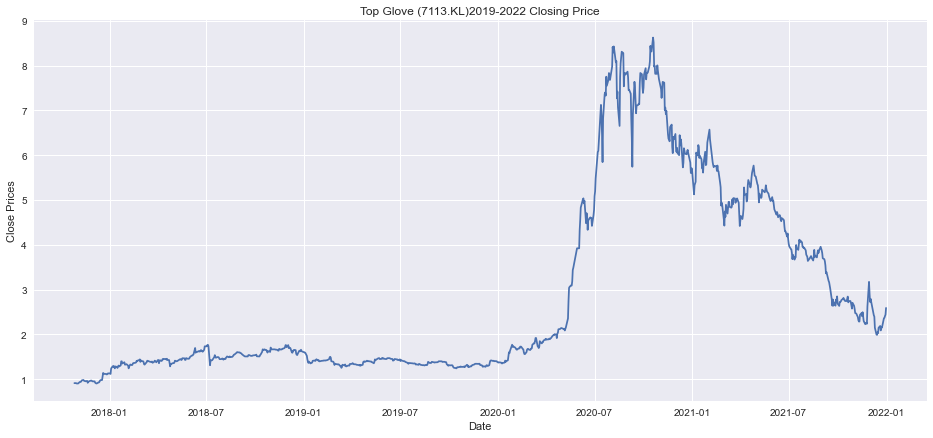

In [6]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Adj Close'])
plt.title('Top Glove (7113.KL)2019-2022 Closing Price')
plt.show()

In [7]:
data = df.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on

training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

771

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.09904755e-03],
       [1.09904755e-03],
       [1.83131420e-04],
       ...,
       [1.95072262e-01],
       [1.98957653e-01],
       [2.18384607e-01]])

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00109905, 0.00109905, 0.00018313, 0.00018313, 0.00018313,
       0.        , 0.00439645, 0.00439645, 0.00476271, 0.00659454,
       0.00915916, 0.01025821, 0.00805998, 0.00732733, 0.0071442 ,
       0.00641141, 0.00751046, 0.00201496, 0.00476271, 0.00567863,
       0.00659454, 0.00842638, 0.00842638, 0.0071442 , 0.00622815,
       0.00622815, 0.00604502, 0.00238136, 0.00128218, 0.00018313,
       0.00018313, 0.00293088, 0.00293088, 0.00476271, 0.00787685,
       0.00970869, 0.01007495, 0.01996689, 0.03040836, 0.02894292,
       0.02766062, 0.02766062, 0.0267447 , 0.02619518, 0.02729422,
       0.02930932, 0.02894292, 0.02766062, 0.0424984 , 0.04597894,
       0.05074178, 0.04762764, 0.04938448, 0.04383666, 0.04938448,
       0.04772024, 0.0449462 , 0.04938448, 0.05178863, 0.04919954])]
[0.05215852239105395]

[array([0.00109905, 0.00109905, 0.00018313, 0.00018313, 0.00018313,
       0.        , 0.00439645, 0.00439645, 0.00476271, 0.00659454,
       0.00915916, 0.01025821, 0.00

In [80]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

# Build the LSTM model
model = Sequential()
 #Add the first LSTM layer
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#add additional layer
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(optimizer='SGD', loss='mean_squared_error')
# Train the model
history=model.fit(x_train, y_train, batch_size=3, epochs=40)
#save the model into h5 file 
#model.save('Lstm_model7.h5')



Epoch 1/40
237/237 [==============================] - 4s 7ms/step - loss: 0.0053
Epoch 2/40
237/237 [==============================] - 2s 7ms/step - loss: 0.0018
Epoch 3/40
237/237 [==============================] - 2s 7ms/step - loss: 0.0015
Epoch 4/40
237/237 [==============================] - 2s 7ms/step - loss: 0.0018
Epoch 5/40
237/237 [==============================] - 2s 7ms/step - loss: 0.0017
Epoch 6/40
237/237 [==============================] - 2s 7ms/step - loss: 0.0010
Epoch 7/40
237/237 [==============================] - 2s 7ms/step - loss: 8.9402e-04
Epoch 8/40
237/237 [==============================] - 2s 7ms/step - loss: 9.0058e-04
Epoch 9/40
237/237 [==============================] - 2s 8ms/step - loss: 8.4361e-04
Epoch 10/40
237/237 [==============================] - 2s 7ms/step - loss: 9.3732e-04
Epoch 11/40
237/237 [==============================] - 2s 7ms/step - loss: 0.0017
Epoch 12/40
237/237 [==============================] - 2s 8ms/step - loss: 8.2279e-04
Epoch

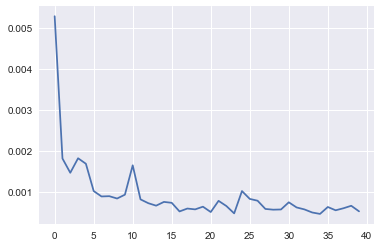

In [81]:
plt.plot(history.history['loss'], label='training loss')


In [82]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [83]:
# Create the testing data set
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import load_model
import math
#model = load_model('Lstm_model7.h5')
# Create a new array containing scaled values 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictionsLSTM = model.predict(x_test)
predictionsLSTM = scaler.inverse_transform(predictionsLSTM)

# Get the root mean squared error (RMSE)
errorLSTM = mean_squared_error(y_test, predictionsLSTM)
error2LSTM = smape_kun(y_test, predictionsLSTM)

print('=============================================')
print('              Diagnostic Check')
print('=============================================')
mseLSTM = mean_squared_error(y_test, predictionsLSTM)
print('MSE: '+str(mseLSTM))
maeLSTM = mean_absolute_error(y_test, predictionsLSTM)
print('MAE: '+str(maeLSTM))
rmseLSTM = math.sqrt(mean_squared_error(y_test, predictionsLSTM))
print('RMSE: '+str(rmseLSTM))
mapeLSTM = np.mean(np.abs(predictionsLSTM - y_test)/np.abs(y_test))
print('MAPE: '+str(mapeLSTM))
print('=============================================')
print('Mean Squared Error: %.3f' % errorLSTM)
print('=============================================')



9/9 [==============================] - 1s 4ms/step
              Diagnostic Check
MSE: 0.02470960595597277
MAE: 0.12136724943928405
RMSE: 0.15719289410139622
MAPE: 0.03183784787931934
Mean Squared Error: 0.025


In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 128)           66560     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 25)                1625      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


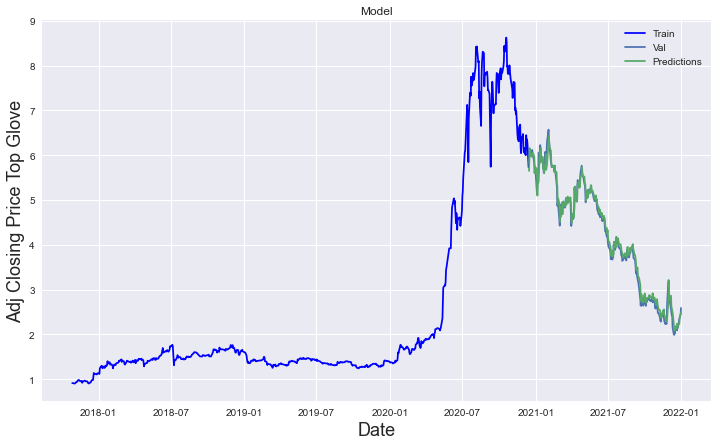

In [85]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsLSTM
# Visualize the data
plt.figure(figsize=(12,7))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Closing Price Top Glove', fontsize=18)
plt.plot(train['Adj Close'],'green', color='blue', label='Training Data')
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

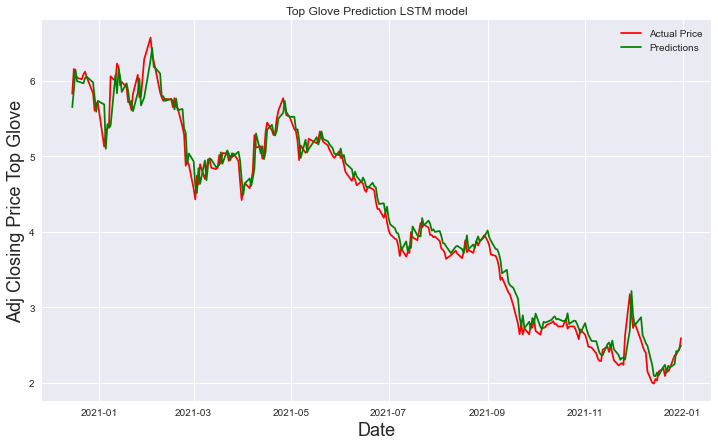

In [86]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsLSTM
# Visualize the data
plt.figure(figsize=(12,7))
plt.title('Top Glove Prediction LSTM model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Closing Price Top Glove', fontsize=18)
plt.plot(valid['Adj Close'],color='red', label='Actual Price')
plt.plot(valid['Predictions'],color='green')
plt.legend(['Actual Price', 'Predictions'], loc='upper right')
plt.show()

In [87]:
valid[['Adj Close', 'Predictions']]

,Adj Close,Predictions
Date,,
2020-12-15,5.827806,5.648844
2020-12-16,6.155108,5.876186
2020-12-17,6.091466,6.147215
2020-12-18,6.036916,5.992418
2020-12-21,6.018733,5.973341
...,...,...
2021-12-27,2.360000,2.245670
2021-12-28,2.370000,2.416062
2021-12-29,2.410000,2.413110


In [88]:
valid = valid.append(pd.DataFrame(columns=valid.columns,index=pd.date_range(start=valid.index[-1], periods=6, freq='D', closed='right')))

In [89]:
valid['2021-12-28':'2022-01-05']

,Adj Close,Predictions
2021-12-28,2.37,2.416062
2021-12-29,2.41,2.413110
2021-12-30,2.44,2.456844
2021-12-31,2.59,2.490339
2022-01-01,NaN,NaN
2022-01-02,NaN,NaN
2022-01-03,NaN,NaN
2022-01-04,NaN,NaN
2022-01-05,NaN,NaN


In [90]:
upcoming_prediction = pd.DataFrame(columns=['Adj Close'],index=valid.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [91]:
curr_seq = x_test[-1:]

for i in range(-5,0):
    up_pred = model.predict(curr_seq)
    upcoming_prediction.iloc[i] = up_pred
    curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
    curr_seq = curr_seq.reshape(x_test[-1:].shape)

1/1 [==============================] - 0s 19ms/step


In [92]:
upcoming_prediction[['Adj Close']] = scaler.inverse_transform(upcoming_prediction[['Adj Close']])

In [93]:
upcoming_prediction['2022-01-01':'2022-01-05']

,Adj Close
2022-01-01,2.490339
2022-01-02,2.544307
2022-01-03,2.599296
2022-01-04,2.654413
2022-01-05,2.709592


In [94]:
upcoming_prediction['2022-01-01':'2022-01-05']

,Adj Close
2022-01-01,2.490339
2022-01-02,2.544307
2022-01-03,2.599296
2022-01-04,2.654413
2022-01-05,2.709592


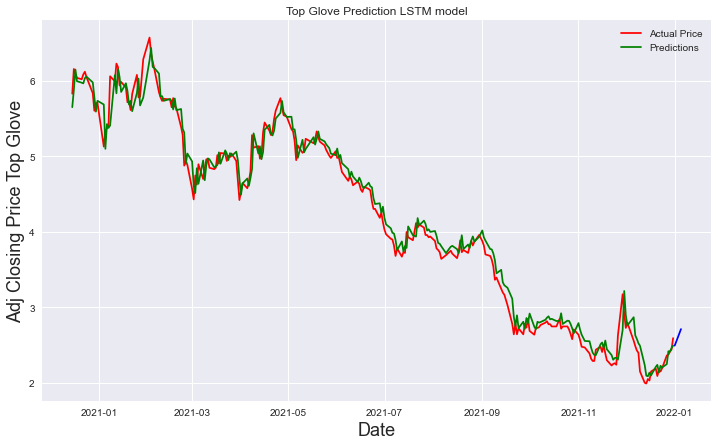

In [95]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsLSTM
# Visualize the data
plt.figure(figsize=(12,7))
plt.title('Top Glove Prediction LSTM model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Closing Price Top Glove', fontsize=18)
plt.plot(valid['Adj Close'],color='red', label='Actual Price')
plt.plot(valid['Predictions'],color='green',label='Prediction')
plt.plot(upcoming_prediction['2022-01-01':'2022-01-05'],color='blue',label='Future Price')
plt.legend(['Actual Price', 'Predictions'], loc='upper right')
plt.show()